# **Simulating Quantum Noise with Qiskit**

In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer #
!pip install qiskit-experiments
!pip install qiskit-ibm-runtime



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=0813936c5bd94ce7046a5bce5b595b6c0df7764c5fe769bc727b149cfcc3496b
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 97.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import qiskit
print(qiskit.__version__)

In [ ]:
!pip install qiskit --upgrade


What is a noise model?

A noise model in quantum computing is a mathematical representation of the unwanted effects that can impact a quantum system.



Task: Simulate

1) depolarizing noise

2) phase damping

3) bit flipping

In quantum computing, the noise model refers to a mathematical representation of how a quantum system deviates from its ideal behavior due to imperfections in the physical implementation.

These imperfections arise from various factors like environmental interactions, hardware limitations, or imperfect gate operations.

Noise models are crucial for simulating quantum circuits and understanding how quantum algorithms will perform on noisy quantum computers, which is a key aspect of quantum error correction.

We'll use qiskit Aer noise module.

Three key classes are

NoiseModel(which stores a noise model used for noisy simulation.)

QuantumError (These can be applied:

After gate or reset instructions, Before measure instructions.)

ReadoutError(describes classical readout errors)

In [ ]:
# roughly approximates the errors one would encounter when using that (brisbane) backend

"""from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
noise_model = NoiseModel.from_backend(backend)"""

When adding a quantum error to a noise model, we must specify the type of instruction that it acts on and what qubits to apply it to.

There are two cases of quantum errors:

All-qubit quantum error

Specific qubit quantum error

In [32]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.visualization import plot_histogram
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
)

Depolarizing error is a type of noise that can affect a quantum system, typically causing it to transition from a pure quantum state to a mixed state, thereby introducing uncertainty in quantum computations.


This error is commonly used in quantum simulations and models to mimic real-world imperfections in quantum devices, such as noise due to decoherence, gate imperfections, and interaction with the environment.

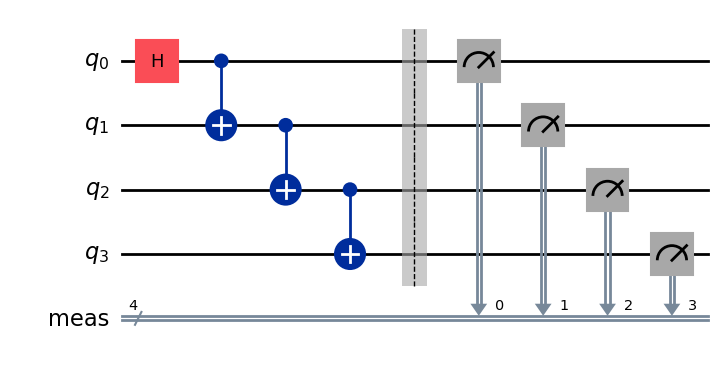

In [3]:
#  step 1: let's build a 4 qubit ghz state
n = 4
circuit = QuantumCircuit(n)
circuit.h(0)
for i in range(n - 1):
  circuit.cx(i, i+1)

circuit.measure_all()
# print(circuit.draw('mpl'))
circuit.draw('mpl')

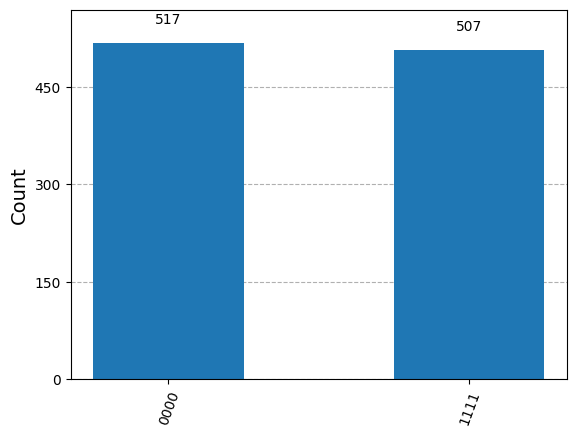

In [4]:
# Ideal simulator and execution
sim_ideal = AerSimulator()
result_ideal = sim_ideal.run(circuit).result()
counts = result_ideal.get_counts(0)
plot_histogram(result_ideal.get_counts(0))

In [5]:
# create an empty NoiseModel
noise_model = NoiseModel()

# let's add depolarizing error to all single qubit gates

error = depolarizing_error(0.1, num_qubits=1)   # 10% noise

noise_model.add_all_qubit_quantum_error(error, ["u1", "u2", "u3", "h", "x", "y", "z", "s"])

print(noise_model)   #it will print noise model information


# p_error: 0.2 -> very noisy, 0.01 -> noise free system...

# let's add depolarizing error to specific single qubit gates
"""error = depolarizing_error(0.1, num_qubits=1)
noise_model.add_quantum_error(error, ["u1", "u2", "u3"], [0])
print(noise_model)"""

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 's', 'sx', 'u1', 'u2', 'u3', 'x', 'y', 'z']
  Instructions with noise: ['x', 'y', 'u3', 'u2', 'z', 's', 'h', 'u1']
  All-qubits errors: ['u1', 'u2', 'u3', 'h', 'x', 'y', 'z', 's']


'error = depolarizing_error(0.1, num_qubits=1)\nnoise_model.add_quantum_error(error, ["u1", "u2", "u3"], [0])\nprint(noise_model)'

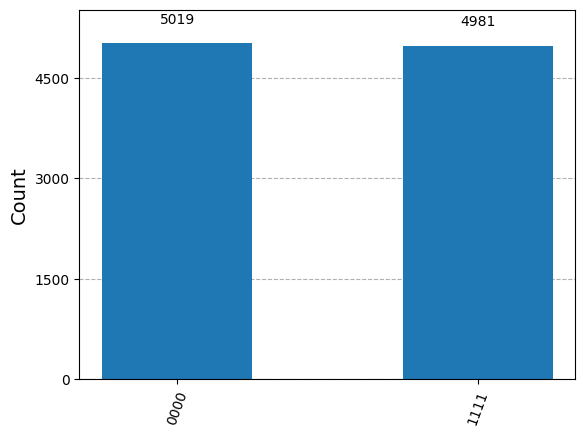

In [6]:
# noisy simulator and execution
from qiskit import transpile
sim_ideal = AerSimulator(noise_model=noise_model, method='statevector')  #create a noisy simulator backend
circuit = transpile(circuit, sim_ideal)
result_ideal = sim_ideal.run(circuit, shots=10000).result()
counts = result_ideal.get_counts(0)
plot_histogram(result_ideal.get_counts(0))

Figure(914.831x451.5)


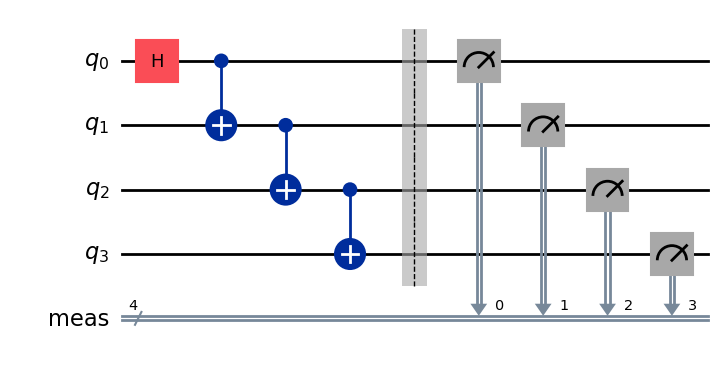

In [7]:
#  step 1: let's build a 4 qubit ghz state
n = 4
circ = QuantumCircuit(n)
circ.h(0)
for i in range(n - 1):
  circ.cx(i, i+1)

circ.measure_all()
print(circuit.draw('mpl'))
circ.draw('mpl')

In [ ]:
"""from qiskit_aer.noise import NoiseModel, pauli_error

# Create a noise model with a bit-flip error on qubit 0
noisemodel_bitflip = NoiseModel()
bit_flip_error = pauli_error([("X", 0.1), ("I", 0.9)])  # 10% chance of bit flip
noisemodel_bitflip.add_all_qubit_quantum_error(bit_flip_error, ["id", "x", "h"])"""

In [8]:
#  bit flip noise model
# example error probabilities

p_gate1 = 0.05
p_meas = 0.2
p_reset = 0.05 #5% chance of a bit-flip error during the reset operation.

error_gate = pauli_error([('X', p_gate1), ('I', 1 - p_gate1)])  # with probability 1−p, there is no error and with probability p, there is a bit-flip error.
# error_meas = readout_error([('X', p_meas), ('I', 1 - p_meas)])
error_meas = ReadoutError([[1 - p_meas, p_meas], [p_meas, 1 - p_meas]])
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_gate2 = error_gate.tensor(error_gate) #both qubits will experiencthe same error probability modeling noise on 2 qubit gates

#  let's add the errors to the noise model

noisemodel_bitflip = NoiseModel()
noisemodel_bitflip.add_all_qubit_quantum_error(error_gate, ['u1', 'u2', 'u3'])
noisemodel_bitflip.add_all_qubit_quantum_error(error_reset, ['reset'])
noisemodel_bitflip.add_all_qubit_readout_error(error_meas)

print(noisemodel_bitflip)  #print the noise model



NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['measure', 'u3', 'u2', 'u1', 'reset']
  All-qubits errors: ['u1', 'u2', 'u3', 'reset', 'measure']


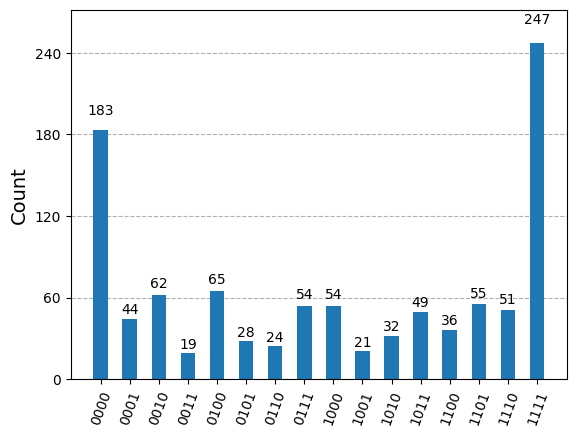

In [9]:
# simulate the noise model
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noisemodel_bitflip)

# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(
    optimization_level=3, backend=sim_noise
)
circ_tnoise = passmanager.run(circ)

# Run and get counts
result_bit_flip = sim_noise.run(circ_tnoise).result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram(counts_bit_flip)

In [10]:
# phase damping
from qiskit_aer.noise import phase_damping_error
n = 4
circ2 = QuantumCircuit(n)
circ2.h(0)
for i in range(n - 1):
  circ2.cx(i, i+1)

circ2.measure_all()
# print(circuit.draw('mpl'))
circ2.draw('mpl')

error = 0.5  #probability of phase damping
noisemodel_phasedamping = NoiseModel()

phasedamping_error = phase_damping_error(error, 1)
noisemodel_phasedamping.add_all_qubit_quantum_error(phasedamping_error, ["h"])
# noise_model.add_all_qubit_quantum_error(depolarizing_error(0.2, num_qubits=1), ["h", "cx"])

print(noisemodel_phasedamping)

NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['h']
  All-qubits errors: ['h']


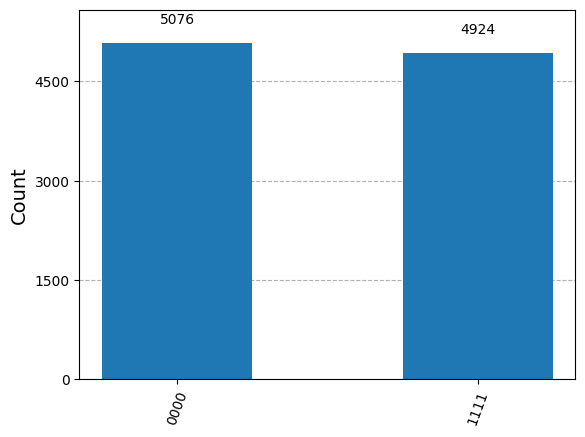

In [11]:
# Create noisy simulator backend
sim_noise = AerSimulator(noise_model=noisemodel_phasedamping)

# Transpile circuit for noisy basis gates
passmanager = generate_preset_pass_manager(
    optimization_level=3, backend=sim_noise
)
circ_tnoise = passmanager.run(circ2)

# Run and get counts
result_noise = sim_noise.run(circ_tnoise, shots=10000).result()
counts_noise = result_noise.get_counts()
plot_histogram(counts_noise)

In [ ]:
from qiskit_ibm_runtime import IBMQ
IBMQ.save_account('62c72edf4b8d2532ca8596d72102e90c72038ffa88fe2e5e6a556a70bfcaef41bde7f07cf4d0eca0fb8eddc2b3867e98eb295237ed20c87acea659173b386a89', overwrite=True)  # Run this only once
IBMQ.load_account()  # Load your IBMQ account


ImportError: cannot import name 'IBMQ' from 'qiskit_ibm_runtime' (/usr/local/lib/python3.10/dist-packages/qiskit_ibm_runtime/__init__.py)

In [ ]:
# combining all the noise together
combined_noise_model = NoiseModel()
combined_noise_model.add_all_qubit_quantum_error(depolarizing_error(0.1, 1), ['h'])
combined_noise_model.add_all_qubit_quantum_error(phase_damping_error(0.2), ['h'])
combined_noise_model.add_all_qubit_quantum_error(pauli_error([("X", 0.1), ("I", 0.9)]), ['x'])

simulator = AerSimulator(noise_model=combined_noise_model)
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

print(result.get_counts())


NameError: name 'qc' is not defined

In [33]:
# implementing shors code, which protects against bit and phase flip errors

def shor_code():
    qc = QuantumCircuit(9, 1)

    # Encoding
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)

    qc.cx(0, 3)
    qc.cx(1, 4)
    qc.cx(2, 5)
    qc.barrier()

    qc.cx(3, 6)
    qc.cx(4, 7)
    qc.cx(5, 8)
    qc.barrier()

    # Simulating a bit-flip error
    qc.x(4)  # Introduce an error
    qc.barrier()

    # Decoding and error correction
    qc.cx(3, 0)
    qc.cx(4, 1)
    qc.cx(5, 2)

    qc.cx(6, 3)
    qc.cx(7, 4)
    qc.cx(8, 5)
    qc.barrier()

    qc.ccx(3, 4, 0)
    qc.ccx(5, 6, 1)
    qc.barrier()

    qc.measure(0, 0)

    return qc

shor_circuit = shor_code()
simulator = AerSimulator()
compiled_circuit = transpile(shor_circuit, simulator)
result = simulator.run(compiled_circuit).result()
print(result.get_counts())


{'0': 1024}


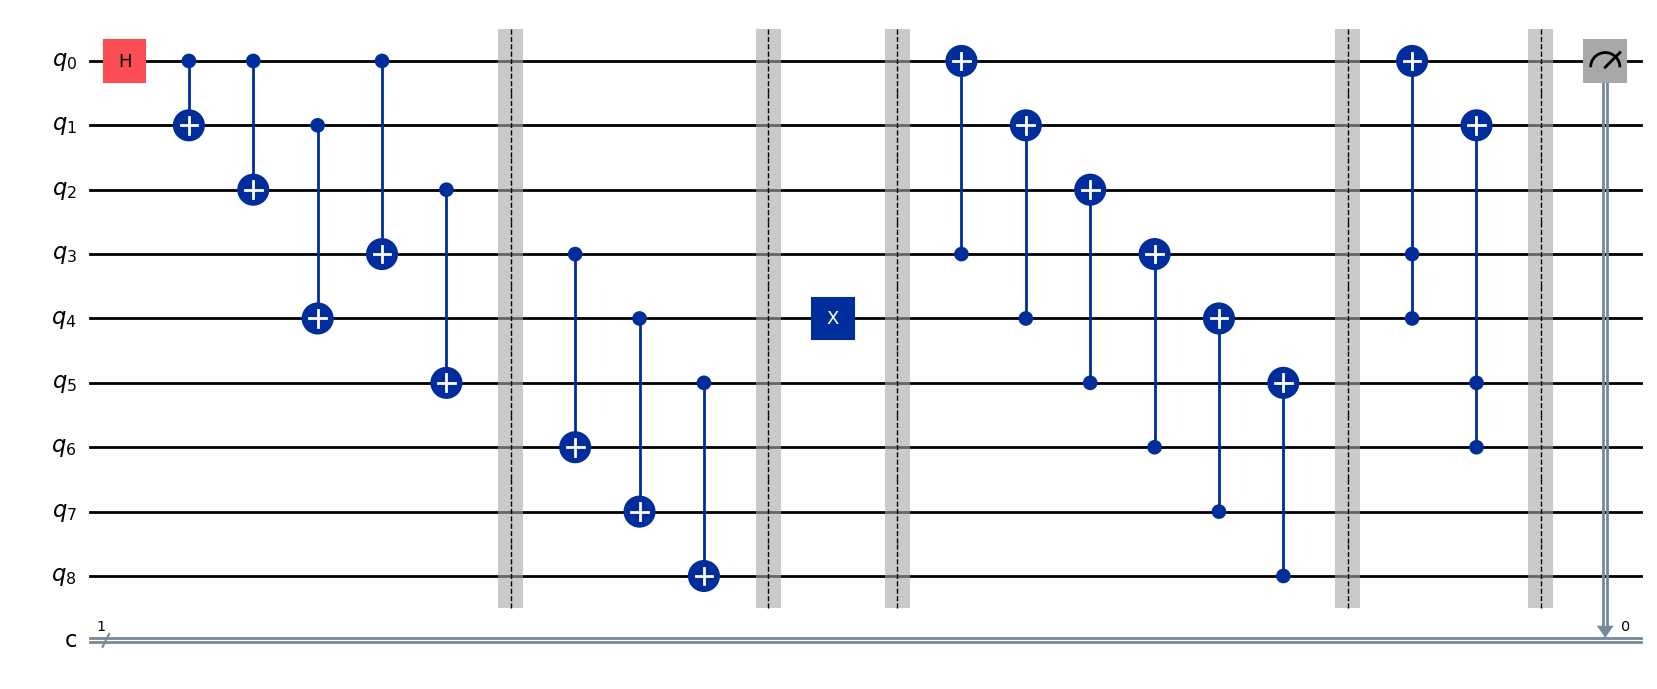

In [34]:
shor_circuit.draw('mpl')

In [35]:
# more scalable error correction method SURFACE CODE

from qiskit import QuantumRegister, ClassicalRegister

def surface_code():
    qreg = QuantumRegister(5)
    creg = ClassicalRegister(1)
    qc = QuantumCircuit(qreg, creg)

    # Encoding
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)

    # Introduce an error
    qc.x(1)

    # Syndrome measurement
    qc.cx(1, 3)
    qc.cx(2, 3)
    qc.measure(3, 0)

    return qc

surface_circuit = surface_code()
simulator = AerSimulator()
compiled_circuit = transpile(surface_circuit, simulator)
result = simulator.run(compiled_circuit).result()
print(result.get_counts())


{'1': 1024}


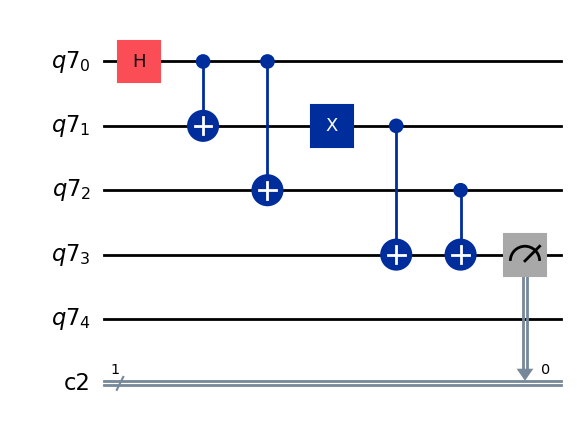

In [36]:
surface_circuit.draw('mpl')

In [38]:
#  let's apply shor's code to the noisy circuit
combined_noise_model = NoiseModel()
combined_noise_model.add_all_qubit_quantum_error(depolarizing_error(0.1, 1), ['h'])
combined_noise_model.add_all_qubit_quantum_error(phase_damping_error(0.2), ['h'])
combined_noise_model.add_all_qubit_quantum_error(pauli_error([("X", 0.1), ("I", 0.9)]), ['x'])
shor_circuit = shor_code()
noisy_simulator = AerSimulator(noise_model=combined_noise_model)

compiled_circuit = transpile(shor_circuit, noisy_simulator)
result = noisy_simulator.run(compiled_circuit).result()

print(result.get_counts())


{'1': 158, '0': 866}


In [40]:
# let's compare results with and without error correction

# Without error correction
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.x(0)  # Introduce bit-flip
qc.measure(0, 0)

noisy_simulator = AerSimulator(noise_model=combined_noise_model)
compiled_circuit = transpile(qc, noisy_simulator)
result = noisy_simulator.run(compiled_circuit).result()

print("Without error correction:", result.get_counts())

# With error correction (Shor code)
shor_circuit = shor_code()
compiled_circuit = transpile(shor_circuit, noisy_simulator)
result = noisy_simulator.run(compiled_circuit).result()

print("With error correction:", result.get_counts())


Without error correction: {'1': 500, '0': 524}
With error correction: {'1': 155, '0': 869}


In [41]:
# noise simulation with corrected errors using shor's algorithm
def simulate(qc, noise_model=None):
    simulator = AerSimulator(noise_model=noise_model) if noise_model else AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit).result()
    return result.get_counts()

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

print("Noisy Simulation:", simulate(qc, combined_noise_model))
print("With Error Correction:", simulate(shor_code(), combined_noise_model))


Noisy Simulation: {'1': 496, '0': 528}
With Error Correction: {'1': 139, '0': 885}


Grover's Algorithm

In [42]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [43]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
# service = QiskitRuntimeService(channel="ibm_quantum")
# backend = service.least_busy(operational=True, simulator=False)
# backend.name

In [44]:
def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc

<ipython-input-44-6de8e9ca2dbc>:27: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.mcmt.MCMT`` is deprecated as of qiskit 1.4. It will be removed no earlier than 3 months after the release date. Use MCMTGate instead.
  qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)


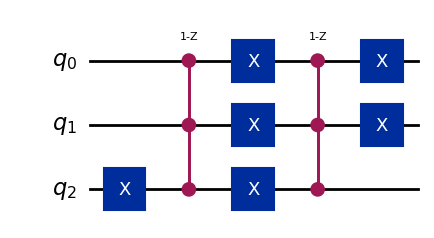

In [45]:
marked_states = ["011", "100"]

oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

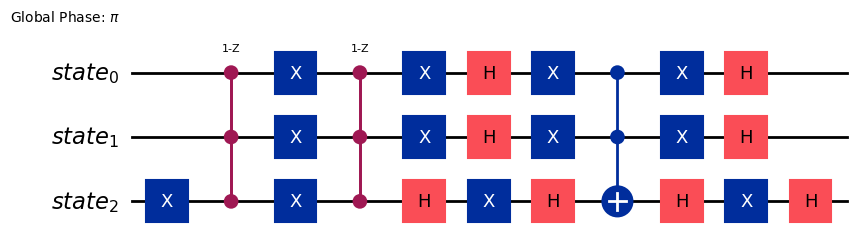

In [46]:
grover_op = GroverOperator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

In [47]:
optimal_num_iterations = math.floor(
    math.pi / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)

Full grover circuit

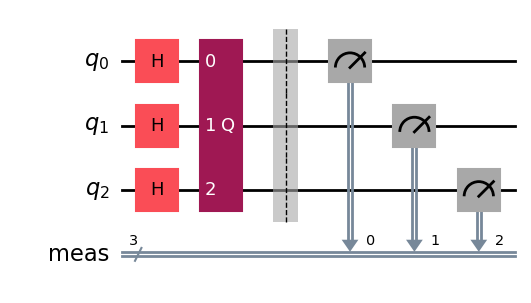

In [48]:
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")

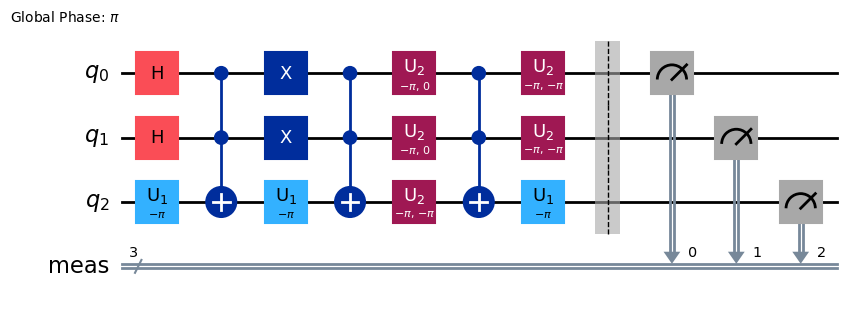

In [49]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend = AerSimulator()
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

In [50]:
# To run on local simulator:
#   1. Use the SatetvectorSampler from qiskit.primitives instead
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10_000
result = sampler.run([circuit_isa]).result()
dist = result[0].data.meas.get_counts()

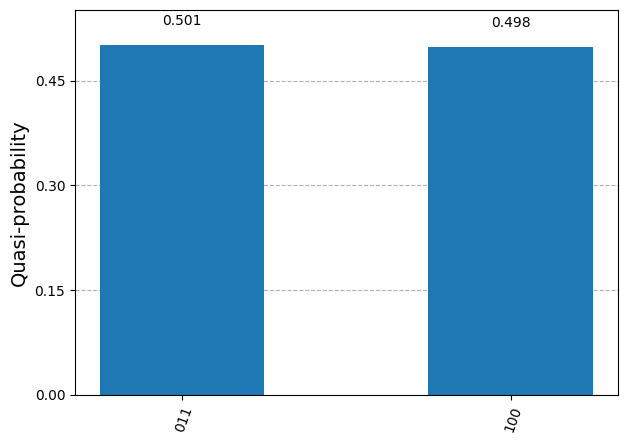

In [51]:
plot_distribution(dist)

The Steane code is a quantum error-correcting code that encodes one logical qubit into seven physical qubits. It is a [[7,1,3]] code, meaning:

It uses 7 qubits to encode 1 logical qubit

It protects against single-qubit errors

It can detect and correct any single-qubit error.



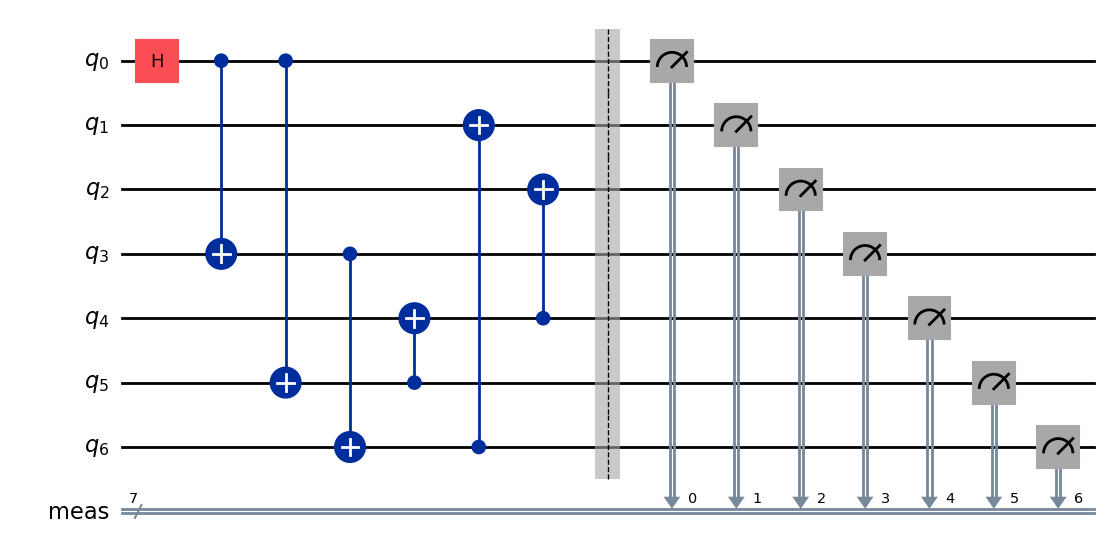

In [70]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

def steane_code():
    """Implement a Steane [7,1,3] quantum error correction code"""
    qc = QuantumCircuit(7)

    # Encoding a logical |0⟩ state
    qc.h(0)
    qc.cx(0, 3)
    qc.cx(0, 5)
    qc.cx(3, 6)
    qc.cx(5, 4)
    qc.cx(6, 1)
    qc.cx(4, 2)
    qc.measure_all()

    return qc

qc_steane = steane_code()
qc_steane.draw('mpl')


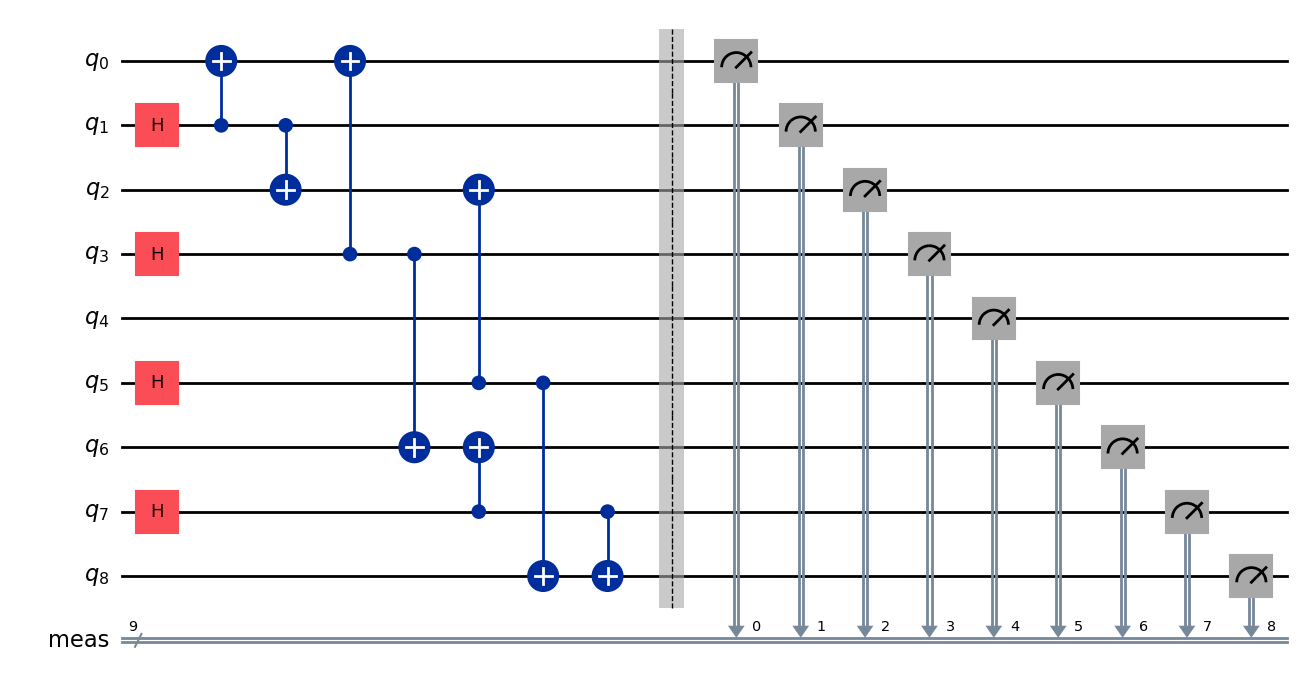

In [72]:
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Pauli

def surface_code():
    """Implement a distance-3 Surface Code"""
    qc = QuantumCircuit(9)

    # Apply stabilizer checks
    qc.h(1)
    qc.h(3)
    qc.h(5)
    qc.h(7)

    qc.cx(1, 0)
    qc.cx(1, 2)
    qc.cx(3, 0)
    qc.cx(3, 6)
    qc.cx(5, 2)
    qc.cx(5, 8)
    qc.cx(7, 6)
    qc.cx(7, 8)
    qc.measure_all()

    return qc

qc_surface = surface_code()
qc_surface.draw('mpl')


In [73]:
# from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
from qiskit import transpile

noise_model = NoiseModel()
depolarizing = depolarizing_error(0.02, 1)
noise_model.add_all_qubit_quantum_error(depolarizing, ['x', 'h'])
# noise_model.add_all_qubit_quantum_error(depolarizing_2q, ['cx'])


simulator = AerSimulator(noise_model=noise_model)

# Transpile for the noisy simulator
transpiled_steane = transpile(qc_steane, simulator)
transpiled_surface = transpile(qc_surface, simulator)

# Run
result_steane = simulator.run(transpiled_steane).result()
result_surface = simulator.run(transpiled_surface).result()

print("Steane Code Fidelity:", result_steane.get_counts())
print("Surface Code Fidelity:", result_surface.get_counts())


Steane Code Fidelity: {'0000000': 486, '1111111': 538}
Surface Code Fidelity: {'101101101': 57, '001001001': 74, '010101010': 57, '011100100': 59, '101101010': 62, '100100011': 64, '111000000': 60, '000000000': 62, '110001001': 69, '111000111': 61, '010101101': 59, '100100100': 64, '001001110': 62, '011100011': 71, '110001110': 87, '000000111': 56}


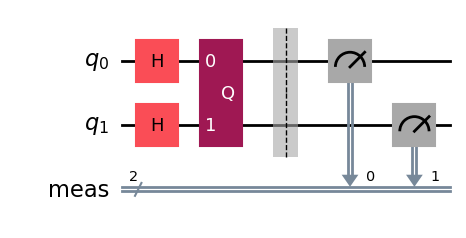

In [87]:
from qiskit import QuantumCircuit
from qiskit_algorithms import AmplificationProblem, Grover
from qiskit.circuit.library import ZGate

def grover_circuit():
    """Implement Grover's Algorithm on a 2-qubit system with measurement"""

    # Define the oracle (marks |11⟩ as the target state)
    oracle = QuantumCircuit(2)
    oracle.cz(0, 1)

    # Define the amplification problem
    problem = AmplificationProblem(oracle, is_good_state=["11"])

    # Create Grover's Algorithm instance
    grover = Grover(iterations=[1])  # Single iteration for simplicity
    circuit = grover.construct_circuit(problem)

    # Add measurement to the circuit
    circuit.measure_all()

    return circuit

# Create and draw the circuit
qc_grover = grover_circuit()
qc_grover.draw('mpl')



In [88]:
transpiled_grover = transpile(qc_grover, simulator)
result_grover = simulator.run(transpiled_grover).result()
print("Grover's Algorithm Counts with Noise:", result_grover.get_counts())


Grover's Algorithm Counts with Noise: {'00': 10, '10': 34, '01': 25, '11': 955}


In [98]:
# from qiskit_providers.fake_provider import FakeToronto
# from qiskit_ibm_runtime.fake_provider import FakeToronto

from qiskit_aer import AerSimulator
from qiskit_aer import noise


backend = AerSimulator()
realistic_simulator = AerSimulator()

# Transpile the circuits for this backend
transpiled_grover_realistic = transpile(qc_grover, realistic_simulator)
result_grover_realistic = realistic_simulator.run(transpiled_grover_realistic).result()

print("Grover's Algorithm with Realistic Noise:", result_grover_realistic.get_counts())


Grover's Algorithm with Realistic Noise: {'11': 1024}


In [77]:
!pip install qiskit-algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 4.7 MB/s eta 0:00:00


In [52]:
import qiskit_ibm_runtime

qiskit_ibm_runtime.version.get_version_info()

'0.36.1'

In [ ]:
import qiskit

qiskit.version.get_version_info()

'1.3.2'

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# Create Quantum and Classical Registers
qr = QuantumRegister(2, name='q')
cr = ClassicalRegister(2, name='c')
grover = QuantumCircuit(qr, cr)

# Apply Hadamard gates
grover.h(qr)

# Oracle for state |11>
grover.cz(qr[0], qr[1])

# Diffuser
grover.h(qr)
grover.x(qr)
grover.h(qr[1])
grover.cx(qr[0], qr[1])
grover.h(qr[1])
grover.x(qr)
grover.h(qr)

# Measurement
grover.measure(qr, cr)

# Draw the circuit
print(grover)



     ┌───┐   ┌───┐┌───┐          ┌───┐┌───┐     ┌─┐   
q_0: ┤ H ├─■─┤ H ├┤ X ├───────■──┤ X ├┤ H ├─────┤M├───
     ├───┤ │ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐└╥┘┌─┐
q_1: ┤ H ├─■─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫─┤M├
     └───┘   └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║ └╥┘
c: 2/════════════════════════════════════════════╩══╩═
                                                 0  1 


In [ ]:
# from qiskit.providers.aer import AerSimulator
# from qiskit.providers.aer.noise import NoiseModel, depolarizing_error

# Create a noise model
noise_model = NoiseModel()

# Depolarizing error probabilities
p1 = 0.01  # Single-qubit gate error probability
p2 = 0.02  # Two-qubit gate error probability

# Add errors to the noise model
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1, 1), ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2, 2), ['cx'])

# Simulate the circuit with noise
simulator = AerSimulator(noise_model=noise_model)
job = simulator.run(grover, shots=1000)
result = job.result()
counts = result.get_counts(grover)
print(counts)


{'10': 5, '00': 10, '01': 5, '11': 980}


In [ ]:
# from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit_experiments.library import StateTomography   # changed the import to qiskit_experiments

# Generate measurement calibration circuits
# meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='measerrormit')
# changed to use the StateTomography class
# which is the new way of setting up tomography experiments in Qiskit Experiments.

# Prepare the tomography experiment
# The StateTomography class allows you to specify the circuits needed for tomography
# and provides tools for analyzing the results
tomo_exp = StateTomography(grover) # grover contains circuit

# Generate the tomography circuits
tomo_circuits = tomo_exp.circuits()

# Execute the tomography circuits
# Note that in your original code, you were running the calibration circuits on a simulator
# We can update that to use the Aer simulator as an example here

backend = AerSimulator()
job = backend.run(tomo_circuits)
# compiled_circuit = transpile(shor_circuit, simulator)
# result = simulator.run(compiled_circuit).result()
# Get the results
# result = backend.run(tomo_circuits).result()
# Process the results to reconstruct the density matrix
#tomo_results = tomo_exp.analysis.run(result)  # or result to directly analyze the results
# Get the counts
counts = result.get_counts()


# Apply measurement error mitigation if desired
# (There is an option to apply error mitigation to the resulting state of state tomography)

#from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit_experiments.library import StateTomography   # changed the import to qiskit_experiments
from qiskit import transpile

# ... (rest of your code) ...

backend = AerSimulator()

# Transpile the tomography circuits to the basis gates supported by the backend
# This will replace PauliMeasZ with supported gates like measure and z gates.
transpiled_tomo_circuits = [transpile(circ, backend) for circ in tomo_circuits]

job = backend.run(transpiled_tomo_circuits)

# ... (rest of your code) ...
print("Mitigated counts:", counts)  # changed mitigated_counts to counts

Mitigated counts: {'10': 5, '00': 10, '01': 5, '11': 980}


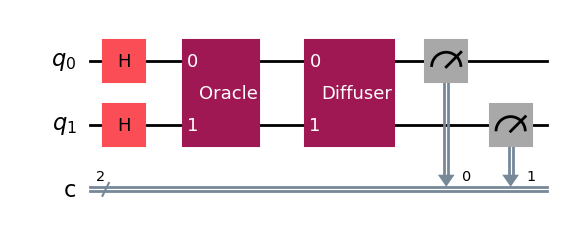

In [ ]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
import numpy as np

# Define the oracle for |11> as the marked state
oracle = QuantumCircuit(2)
oracle.cz(0, 1)  # Apply controlled-Z gate
oracle.to_gate()
oracle.name = "Oracle"

# Define the diffusion operator
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.x([0, 1])
diffuser.h(1)
diffuser.cx(0, 1)
diffuser.h(1)
diffuser.x([0, 1])
diffuser.h([0, 1])
diffuser.to_gate()
diffuser.name = "Diffuser"

# Grover's Algorithm Circuit
grover = QuantumCircuit(2, 2)
grover.h([0, 1])  # Apply Hadamard gates
grover.append(oracle, [0, 1])
grover.append(diffuser, [0, 1])
grover.measure([0, 1], [0, 1])

grover.draw('mpl')


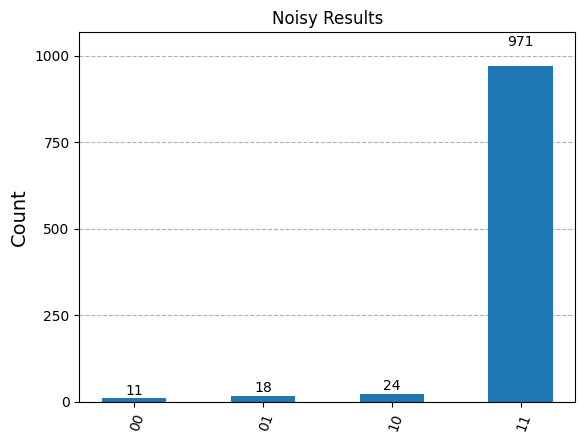

In [ ]:
# from qiskit.providers.aer import AerSimulator
# from qiskit.providers.aer.noise import NoiseModel, depolarizing_error

# Create a noise model
noise_model = NoiseModel()

# Add depolarizing error for single-qubit gates
p1 = 0.01  # Probability of depolarizing error
p2 = 0.02  # Probability of depolarizing error for 2-qubit gates
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1, 1), ['h', 'x'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2, 2), ['cx'])

# Simulate with noise
simulator = AerSimulator(noise_model=noise_model)
tqc = transpile(grover, simulator)
job = simulator.run(tqc)
result = job.result()
counts_noisy = result.get_counts()

plot_histogram(counts_noisy, title="Noisy Results")


In [ ]:
#  from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
from qiskit_experiments.library import StateTomography   # changed the import to qiskit_experiments

# Generate measurement calibration circuits
# meas_calibs, state_labels = complete_meas_cal(qr=qr, circlabel='measerrormit')
# changed to use the StateTomography class
# which is the new way of setting up tomography experiments in Qiskit Experiments.

# Prepare the tomography experiment
# The StateTomography class allows you to specify the circuits needed for tomography
# and provides tools for analyzing the results
tomo_exp = StateTomography(grover) # grover contains circuit

# Generate the tomography circuits
tomo_circuits = tomo_exp.circuits()

# Execute the tomography circuits
# Note that in your original code, you were running the calibration circuits on a simulator
# We can update that to use the Aer simulator as an example here

backend = AerSimulator()
job = backend.run(tomo_circuits)
# compiled_circuit = transpile(shor_circuit, simulator)
# result = simulator.run(compiled_circuit).result()
# Get the results
# result = backend.run(tomo_circuits).result()
# Process the results to reconstruct the density matrix
#tomo_results = tomo_exp.analysis.run(result)  # or result to directly analyze the results
# Get the counts
counts = result.get_counts()


In [ ]:
# from qiskit_aer import amplify_noise
from qiskit_aer.noise import NoiseModel

# Amplify noise (simulate running at higher noise levels)
noise_factors = [1, 2, 3]  # Different noise strengths
results = []

for factor in noise_factors:
    # Instead of amplify_noise and noise_model.copy(), manually amplify the errors:
    amplified_noise_model = NoiseModel()  # Create a new NoiseModel
    for instruction_error in noise_model._instruction_errors:  # Access error data
        for qubits, error in instruction_error:
            # Amplify the error probability (be careful not to exceed 1)
            amplified_error = error.copy()  # Copy the error to modify safely
            for i in range(len(amplified_error.probabilities)):
                amplified_error.probabilities[i] *= min(factor, 1.0 / amplified_error.probabilities[i])

            amplified_noise_model.add_quantum_error(amplified_error, instruction_error[0][0], qubits) # adding error to noise model

    # Add other error types (readout, reset) similarly if needed

    simulator = AerSimulator(noise_model=amplified_noise_model)
    job = simulator.run(tqc)
    results.append(job.result().get_counts())
# Perform extrapolation (simple linear regression for now)
import numpy as np
x = np.array(noise_factors)
y = np.array([list(res.values())[0] for res in results])  # Extract probabilities
fit = np.polyfit(x, y, 1)
extrapolated_value = np.polyval(fit, 0)  # Extrapolate to zero noise

print("Extrapolated Zero-Noise Result:", extrapolated_value)


AttributeError: 'NoiseModel' object has no attribute '_instruction_errors'

In [58]:
# -*- coding: utf-8 -*-

"""Generates circuits for quantum error correction with surface code patches."""

import qiskit
from qiskit import QuantumRegister, ClassicalRegister
import copy
import warnings
import networkx as nx
import numpy as np
from qiskit import QuantumCircuit
from random import randrange
import matplotlib

try:
    from qiskit_aer import AerSimulator

    HAS_AER = True
except ImportError:
    from qiskit_aer import BasicAer

    HAS_AER = False


class SurfaceCode:
    """
    Implementation of a distance d surface code, implemented over
    T syndrome measurement rounds.
    """

    def __init__(self, d, T):
        """
        Creates the circuits corresponding to a logical 0 encoded
        using a surface code with X and Z stabilizers.
        Args:
            d (int): Number of physical "data" qubits. Only odd d's allowed
            T (int): Number of rounds of ancilla-assisted syndrome measurement. Normally T=d
        Additional information:
            No measurements are added to the circuit if `T=0`. Otherwise
            `T` rounds are added, followed by measurement of the code
            qubits (corresponding to a logical measurement and final
            syndrome measurement round)
            This circuit is for "rotated lattices" i.e. it requires
            d**2 data qubits and d**2-1 syndrome qubits only. Hence,
            d=odd allows equal number of Z and X stabilizer mesaurments.
        """
        self.d = d
        self.T = 0
        self.data = QuantumRegister(d ** 2, "data")
        self.ancilla = QuantumRegister((d ** 2 - 1), "ancilla")
        self.qubit_registers = {"data", "ancilla"}
        self.output = []
        self.circuit = {}
        self.c_output = ClassicalRegister(d ** 2, "c_output")

        """This code creates circuits only for log='0' but it can be easily
        modified to accomodate circuuit for log='1' """

        for log in ["0", "1"]:
            self.circuit[log] = QuantumCircuit(self.ancilla, self.data, name=log)

        #        self._preparation() to be included to create log='1'

        for _ in range(T - 1):
            self.syndrome_measurement()

        if T != 0:
            self.syndrome_measurement(reset=False)
            self.readout()

    def get_circuit_list(self):
        """
        Returns:
            circuit_list: self.circuit as a list, with
            circuit_list[0] = circuit['0']
            circuit_list[1] = circuit['1']
        """
        circuit_list = [self.circuit[log] for log in ["0", "1"]]
        return circuit_list

    """It assigns vertices to qubits on a 2D graph, where,
    data qubits are on the x lines and, syndrome qubits are
    on the 0.5+x lines, in the cartesian coordinate system, where x is an integer."""

    def lattice(self):
        d = self.d
        data_string = nx.Graph()
        syndrome_string = nx.Graph()
        for i in range(0, d):
            for j in range(0, d):
                data_string.add_node((i, j))
        for k in range(0, d, 1):
            for i in range(0, d + 1, 1):
                for j in range(0, d + 1, 1):
                    if (i + j) % 2 != 0:
                        if ((i % 2 == 0) and j != d) or ((i % 2 == 1) and (j != 0)):
                            syndrome_string.add_node(((2 * i - 1) / 2, (2 * j - 1) / 2))
                    else:
                        if ((j % 2 == 0) and i != 0) or ((j % 2 == 1) and (i != d)):
                            syndrome_string.add_node(((2 * i - 1) / 2, (2 * j - 1) / 2))

        syn_ind = list(syndrome_string.nodes)
        data_ind = list(data_string.nodes)
        return (syn_ind, data_ind)

    """List of nodes on the 2D lattice graph returned"""
    # def x """to be included to execute self._preparation for log='1' """

    # def _preparation(self):
    """ prapares log '1' from log '0' circuit by applying x logical to the lattice"""

    def connection(self):
        """
        Determines the order of syndrome measurements between data qubits and syndrome qubits.
        We follow the ZN rule here to avoid hook error as described by [https://doi.org/10.1063/1.1499754]
        where Z stabilisers are arranged in 'Z' pattern and X stabilizers in 'N' pattern.
        Refer to the diagram in readme to get the refrence.
        """
        syn_index, data_index = self.lattice()

        order = []
        for i in range(self.d ** 2 - 1):
            d = data_index
            r = syn_index[i][0]
            c = syn_index[i][1]

            def get_index(j):
                for i in range(len(data_index)):
                    if data_index[i] == j:
                        return i

            new = []
            new.append((r, c))
            if r == -0.5:  # top semicircile
                new.append(-1)
                new.append(get_index((r + 0.5, c - 0.5)))
                new.append(-1)
                new.append(get_index((r + 0.5, c + 0.5)))
            elif c == -0.5:  # left semicircle
                new.append(-1)
                new.append(get_index((r - 0.5, c + 0.5)))
                new.append(-1)
                new.append(get_index((r + 0.5, c + 0.5)))

            elif r == self.d - 0.5:  # bottom semicircle

                new.append(get_index((r - 0.5, c - 0.5)))
                new.append(-1)
                new.append(get_index((r - 0.5, c + 0.5)))
                new.append(-1)

            elif c == self.d - 0.5:  # right semicircle
                new.append(get_index((r - 0.5, c - 0.5)))
                new.append(-1)
                new.append(get_index((r + 0.5, c - 0.5)))
                new.append(-1)
            else:
                if (r + c) % 2 == 0:  # square patches
                    new.append(get_index((r - 0.5, c - 0.5)))
                    new.append(get_index((r + 0.5, c - 0.5)))
                    new.append(get_index((r - 0.5, c + 0.5)))
                    new.append(get_index((r + 0.5, c + 0.5)))
                else:
                    new.append(get_index((r - 0.5, c - 0.5)))
                    new.append(get_index((r - 0.5, c + 0.5)))
                    new.append(get_index((r + 0.5, c - 0.5)))
                    new.append(get_index((r + 0.5, c + 0.5)))
            order.append(new)
        return order

    def syndrome_measurement(self, reset=True, barrier=True):
        """
            Application of a syndrome measurement round.
            Args:
                reset (bool): If set to true add a boolean at the end of each round
                barrier (bool): Boolean denoting whether to include a barrier at the end.
                A barrier is included after every round of 'j' which passes through layers of
                cx to be done, because the order should not be disturbed else the stabilizers
                will not be executed since Z and X on the same qubit do not commute. Thus,
                we end up flipping the sign of some stabilizers.
            """
        self.output.append(
            ClassicalRegister((self.d ** 2 - 1), "round_" + str(self.T) + "ancilla")
        )

        for log in ["0", "1"]:
            self.circuit[log].add_register(self.output[-1])
            order = self.connection()
            for j in range(1, 5):
                for i in range(len(order)):
                    k = self.data[order[i][j]]
                    l = self.ancilla[i]
                    if (order[i][0][0] + order[i][0][1]) % 2 == 0:  # Xstabilizer
                        if j == 1:
                            self.circuit[log].h(l)
                        if order[i][j] != -1:
                            self.circuit[log].cx(l, k)
                        if j == 4:
                            self.circuit[log].h(l)
                    else:  # Xstabilizer
                        if order[i][j] != -1:
                            self.circuit[log].cx(k, l)
                if barrier:
                    self.circuit[log].barrier()

            for j in range(self.d ** 2 - 1):
                if (order[j][0][0] + order[j][0][1]) % 2 == 1:  # Z
                    self.circuit[log].measure(self.ancilla[j], self.output[self.T][j])
                if reset:
                    self.circuit[log].reset(self.ancilla[j])

            self.circuit[log].barrier()

            for j in range(self.d ** 2 - 1):
                if (order[j][0][0] + order[j][0][1]) % 2 == 0:  # X
                    self.circuit[log].measure(self.ancilla[j], self.output[self.T][j])
                if reset:
                    self.circuit[log].reset(self.ancilla[j])

        self.T += 1

    def readout(self):
        """
        Readout of all code qubits, which corresponds to a logical measurement
        as well as allowing for a measurement of the syndrome to be inferred.
        """
        for log in ["0", "1"]:
            self.circuit[log].add_register(self.c_output)
            for i in range(self.d ** 2):
                self.circuit[log].measure(self.data[i], self.c_output[i])

    def process_results(self, raw_results):
        """
        Args:
            raw_results (dict): A dictionary whose keys are logical values,
                and whose values are standard counts dictionaries, (as
                obtained from the `get_counts` method of a ``qiskit.Result``
                object).
        Returns:
            syn: d+1 dimensional array where 0th array stores qubit readouts
            while the subsequesnt rows store the results from measurement rounds
            as required for extraction of nodes with errors to be sent to the decoder
        Additional information:
            The circuits must be executed outside of this class, so that
            their is full freedom to compile, choose a backend, use a
            noise model, etc. The results from these executions should then
            be used to create the input for this method.
        """
        results = []
        results = list(max(raw_results, key=raw_results.get))

        syn = []
        new = []
        for i in results:
            for j in range(len(i)):
                if i[j] != " ":
                    new.append(int(i[j]))
                else:
                    syn.append(new)
                    new = []
        syn.append(new)

        return syn

    def extract_nodes(self, syn_meas_results):
        """Extracts node locations of qubits which flipped in
        consecutive rounds (stored as (k,i,j)) and the data qubits which were flipped
        during readout (stored as (-2,i,j)). Here k spans range(0,d-1,1)
        Z syndrome nodes and Z logical data qubit nodes (see figure) in error_nodesZ
        and we do the same for X stabilizers and X logical qubits in error_nodesX.
        Note that arrays are reversed in terms of syndrome rounds, when compared to
        syn_meas_results
        """
        processed_results = []
        new = []
        for j in syn_meas_results[0]:
            new.append(j)
        processed_results.append(new)
        new = []
        for j in syn_meas_results[len(syn_meas_results) - 1]:
            new.append(j)
        processed_results.append(new)

        for i in range(len(syn_meas_results) - 2, 0, -1):
            new = []
            for j in range(0, len(syn_meas_results[i])):
                new.append((syn_meas_results[i][j] + syn_meas_results[i + 1][j]) % 2)
            processed_results.append(new)

        syn, dat = self.lattice()
        error_nodesX = []
        error_nodesZ = []

        # first_row = processed_result[0][:self.d]
        # last_row = processed_result[0][-self.d - 1:-1]

        # left_col = processed_result[0][::self.d]
        # right_col = processed_result[0][self.d-1:-1:self.d]

        # if sum(first_row) % 2 == 1 or sum(last_row) % 2 == 1:
        #     for node in dat[:self.d]:
        #         # Append virtual node
        #         if node[1] == 0:
        #             error_nodesZ.append((-1, node[0] - 0.5, node[1] - 0.5))
        #         else:
        #             error_nodesZ.append((-1, node[0] - 0.5, node[1] + 0.5))

        #     for node in dat[-self.d - 1:-1]:
        #         if node[1] == self.d - 1:
        #             error_nodesZ.append((-1, node[0] + 0.5, node[1] + 0.5))
        #         else:
        #             error_nodesZ.append((-1, node[0] + 0.5, node[1] - 0.5))

        # if sum(left_col) % 2 == 1 or sum(right_col) % 2 == 1:
        #     for node in dat[::self.d]:
        #         error_nodesX.append((-2, node[0], node[1]))
        #     for node in dat[self.d-1:-1:self.d]:
        #         error_nodesX.append((-2, node[0], node[1]))

        for i in range(1, len(processed_results)):
            for j in range(len(processed_results[i])):

                if processed_results[i][j] == 1:

                    if (syn[j][0] + syn[j][1]) % 2 == 0:
                        error_nodesX.append((i - 1, syn[j][0], syn[j][1]))
                    else:
                        error_nodesZ.append((i - 1, syn[j][0], syn[j][1]))
        return error_nodesX, error_nodesZ

**Fidelity is a measure of how similar two quantum states are. It ranges from 0 to 1, where:**

Fidelity = 1 → The two states are identical (perfect match).


0 < Fidelity < 1 → The two states are partially similar, with higher values meaning more similarity.


Fidelity = 0 → The two states are completely different (orthogonal states).

In [ ]:
# fidelity to check whether the two states are

QEC

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.8/753.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.8 MB/s eta 0:00:00
